<a href="https://colab.research.google.com/github/AriqFaridzki/Intel-Berkley-lab-analysis/blob/main/UTS_analisa_Data_Intel_Research_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analisa Dataset Intel Research Lab Di Berkeley

* NPM : 2242004
* Nama : Muhammad Ariq Faridzki
* Kelas : IF - A

## Persiapan Data

Reference

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
* https://matplotlib.org/stable/index.html
* https://seaborn.pydata.org/tutorial.html

Dataset :

* https://db.csail.mit.edu/labdata/labdata.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip
import seaborn as sns

In [ ]:
!wget https://db.csail.mit.edu/labdata/data.txt.gz

--2023-11-17 05:58:15--  https://db.csail.mit.edu/labdata/data.txt.gz
Resolving db.csail.mit.edu (db.csail.mit.edu)... 128.52.128.91
Connecting to db.csail.mit.edu (db.csail.mit.edu)|128.52.128.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34422518 (33M) [application/x-gzip]
Saving to: ‘data.txt.gz.1’

data.txt.gz.1       100%[===================>]  32.83M  44.4MB/s    in 0.7s    

2023-11-17 05:58:16 (44.4 MB/s) - ‘data.txt.gz.1’ saved [34422518/34422518]



In [ ]:
!wget https://db.csail.mit.edu/labdata/mote_locs.txt

--2023-11-17 05:58:16--  https://db.csail.mit.edu/labdata/mote_locs.txt
Resolving db.csail.mit.edu (db.csail.mit.edu)... 128.52.128.91
Connecting to db.csail.mit.edu (db.csail.mit.edu)|128.52.128.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552 [text/plain]
Saving to: ‘mote_locs.txt.1’

mote_locs.txt.1     100%[===================>]     552  --.-KB/s    in 0s      

2023-11-17 05:58:16 (247 MB/s) - ‘mote_locs.txt.1’ saved [552/552]



## Konversi data menjadi Data Frame


In [ ]:
def getAndExtract(fileLocation, outputFilePath):
# Input gzip file path
  gzip_file_path = fileLocation

  # Output text file path
  output_file_path = outputFilePath

  # Open the gzip file in binary mode and read its contents
  with gzip.open(gzip_file_path, 'rb') as f:
      # Decode the bytes to a string using an appropriate encoding (e.g., 'utf-8')
      file_content = f.read().decode('utf-8')

  # Open the output text file in write mode and write the decoded content
  with open(output_file_path, 'w') as f_out:
      f_out.write(file_content)

In [ ]:
getAndExtract("/content/data.txt.gz", "dataSensor.txt")

In [ ]:
!head "/content/mote_locs.txt"

1 21.5 23
2 24.5 20
3 19.5 19
4 22.5 15
5 24.5 12
6 19.5 12
7 22.5 8
8 24.5 4
9 21.5 2
10 19.5 5


In [ ]:
def toDataFrame(filePath, columnName):  # mengubah ke data frame
  file_path = filePath

  # Read the data from the file and create a DataFrame
  return pd.read_csv(file_path ,delimiter='\s+', header=None, names=columnName)

  # Display the DataFrame
  # print(df)


In [ ]:
intel = toDataFrame("/content/dataSensor.txt", ['Date',
                                  'Timestamp',
                                  'Epoch',
                                  'Moteid',
                                  'Temperature_(c)',
                                  'Humidity_(%)',
                                  'Tingkat Kecerahan_(Lux)',
                                  'Voltage_(Volt)']
            )


In [ ]:
moteLocs = toDataFrame("/content/mote_locs.txt", ["mote_id", "x_cords", "y_cords" ])

In [ ]:

intel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313682 entries, 0 to 2313681
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date                     object 
 1   Timestamp                object 
 2   Epoch                    int64  
 3   Moteid                   float64
 4   Temperature_(c)          float64
 5   Humidity_(%)             float64
 6   Tingkat Kecerahan_(Lux)  float64
 7   Voltage_(Volt)           float64
dtypes: float64(5), int64(1), object(2)
memory usage: 141.2+ MB


In [ ]:
moteLocs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mote_id  54 non-null     int64  
 1   x_cords  54 non-null     float64
 2   y_cords  54 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


In [ ]:
moteLocs.head(5)

,mote_id,x_cords,y_cords
0,1,22,23
1,2,24,20
2,3,20,19
3,4,22,15
4,5,24,12


## Data Cleaning

In [ ]:
intel.isnull() # check jika ada data kosong

,Date,Timestamp,Epoch,Moteid,Temperature_(c),Humidity_(%),Tingkat Kecerahan_(Lux),Voltage_(Volt)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2313677,False,False,False,True,True,True,True,True
2313678,False,False,False,True,True,True,True,True
2313679,False,False,False,True,True,True,True,True
2313680,False,False,False,True,True,True,True,True


In [ ]:
intel.dropna(inplace=True) # menghapus rows yang ada data kosong (NaN)

In [ ]:
# intel.query("`Temperature_(c)` < 0").count()
# intel.query("`Temperature_(c)` > 0 and `Temperature_(c)` < 50").count()

In [ ]:
# intel.query("`Temperature_(c)` > 100").count()
# intel.loc[100:20000,"Temperature_(c)"].max()
intel["Temperature_(c)"].max() # tidak mungkin, dalam dokumentasi, temperatur menggunakan format Celcius

385.568

In [ ]:
intelrevision = intel.query("`Humidity_(%)` <= 100 and `Humidity_(%)` >= 0 ") # humidity hanya dalam 0 - 100% saja

In [ ]:
intelrevision2 = intelrevision.query("`Moteid` <= 54.0") # sensor hanya ada 54 yang dipasang
intelFinal = intelrevision2.query("`Temperature_(c)` >= -2 and `Temperature_(c)` <= 50") # filter


### Setelah Di Cleaning

In [ ]:
intelFinal["Temperature_(c)"].min()


-1.3168

In [ ]:
intelFinal["Temperature_(c)"].max()

49.996

In [ ]:
intelFinal["Moteid"].max()

54.0

In [ ]:
intelFinal["Moteid"].min()

1.0

In [ ]:
intelFinal["Humidity_(%)"].min()

0.42112

In [ ]:
intelFinal["Humidity_(%)"].max()

64.83

In [ ]:
intelFinal

,Date,Timestamp,Epoch,Moteid,Temperature_(c),Humidity_(%),Tingkat Kecerahan_(Lux),Voltage_(Volt)
1,2004-02-28,00:59:16.02785,3,1,20,37,45,3
2,2004-02-28,01:03:16.33393,11,1,19,38,45,3
3,2004-02-28,01:06:16.013453,17,1,19,39,45,3
4,2004-02-28,01:06:46.778088,18,1,19,39,45,3
5,2004-02-28,01:08:45.992524,22,1,19,39,45,3
...,...,...,...,...,...,...,...,...
2303285,2004-03-21,18:53:27.558979,65510,54,21,48,0,2
2303286,2004-03-21,18:54:43.117051,65512,54,21,48,0,2
2303287,2004-03-21,18:57:30.336879,65518,54,21,48,0,2
2303288,2004-03-21,18:59:36.673512,65522,54,21,48,0,2


In [ ]:
intelFinal=intelFinal.reset_index() # index di reset setelah di cleaning

In [ ]:
intelFinal

,index,Date,Timestamp,Epoch,Moteid,Temperature_(c),Humidity_(%),Tingkat Kecerahan_(Lux),Voltage_(Volt)
0,1,2004-02-28,00:59:16.02785,3,1,20,37,45,3
1,2,2004-02-28,01:03:16.33393,11,1,19,38,45,3
2,3,2004-02-28,01:06:16.013453,17,1,19,39,45,3
3,4,2004-02-28,01:06:46.778088,18,1,19,39,45,3
4,5,2004-02-28,01:08:45.992524,22,1,19,39,45,3
...,...,...,...,...,...,...,...,...,...
1809395,2303285,2004-03-21,18:53:27.558979,65510,54,21,48,0,2
1809396,2303286,2004-03-21,18:54:43.117051,65512,54,21,48,0,2
1809397,2303287,2004-03-21,18:57:30.336879,65518,54,21,48,0,2
1809398,2303288,2004-03-21,18:59:36.673512,65522,54,21,48,0,2


## Persiapan Dan Query Data

In [ ]:
intelFinal

,index,Date,Timestamp,Epoch,Moteid,Temperature_(c),Humidity_(%),Tingkat Kecerahan_(Lux),Voltage_(Volt)
0,1,2004-02-28,00:59:16.02785,3,1,20,37,45,3
1,2,2004-02-28,01:03:16.33393,11,1,19,38,45,3
2,3,2004-02-28,01:06:16.013453,17,1,19,39,45,3
3,4,2004-02-28,01:06:46.778088,18,1,19,39,45,3
4,5,2004-02-28,01:08:45.992524,22,1,19,39,45,3
...,...,...,...,...,...,...,...,...,...
1809395,2303285,2004-03-21,18:53:27.558979,65510,54,21,48,0,2
1809396,2303286,2004-03-21,18:54:43.117051,65512,54,21,48,0,2
1809397,2303287,2004-03-21,18:57:30.336879,65518,54,21,48,0,2
1809398,2303288,2004-03-21,18:59:36.673512,65522,54,21,48,0,2


In [ ]:
moteLocs.head(5)


,mote_id,x_cords,y_cords
0,1,22,23
1,2,24,20
2,3,20,19
3,4,22,15
4,5,24,12


In [ ]:
intelFinal.columns
sns.set_theme(style="darkgrid")


In [ ]:
intelFinal.columns

Index(['index', 'Date', 'Timestamp', 'Epoch', 'Moteid', 'Temperature_(c)',
       'Humidity_(%)', 'Tingkat Kecerahan_(Lux)', 'Voltage_(Volt)'],
      dtype='object')

In [ ]:
intelFinalwLoc = pd.merge(intelFinal, moteLocs, left_on='Moteid', right_on='mote_id') # intelFinal dan Coordinat disetiap mote_id

In [ ]:
def calculate_heat_index(temperature_celsius, humidity):
    # Rumus Heat Index yang direkomendasikan oleh NWS untuk suhu dalam Celsius
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582

    heat_index = c1 + (c2 * temperature_celsius) + (c3 * humidity) + (c4 * temperature_celsius * humidity) + (c5 * temperature_celsius**2) + (c6 * humidity**2) + (c7 * temperature_celsius**2 * humidity) + (c8 * temperature_celsius * humidity**2) + (c9 * temperature_celsius**2 * humidity**2)

    return heat_index

# Menambahin kolom Heat Index
intelFinalwLoc['Heat_Index'] = calculate_heat_index(intelFinalwLoc['Temperature_(c)'], intelFinalwLoc['Humidity_(%)'])

untuk rumusnya ada di [climate4life](https://www.climate4life.info/2022/10/kalkulator-indeks-kenyamanan-berdasarkan-suhu-kelembapan-udara.html)

In [ ]:
intelFinalwLoc

,index,Date,Timestamp,Epoch,Moteid,Temperature_(c),Humidity_(%),Tingkat Kecerahan_(Lux),Voltage_(Volt),mote_id,x_cords,y_cords,Heat_Index
0,1,2004-02-28,00:59:16.02785,3,1,20,37,45,3,1,22,23,25
1,2,2004-02-28,01:03:16.33393,11,1,19,38,45,3,1,22,23,25
2,3,2004-02-28,01:06:16.013453,17,1,19,39,45,3,1,22,23,25
3,4,2004-02-28,01:06:46.778088,18,1,19,39,45,3,1,22,23,25
4,5,2004-02-28,01:08:45.992524,22,1,19,39,45,3,1,22,23,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809395,2303285,2004-03-21,18:53:27.558979,65510,54,21,48,0,2,54,26,2,25
1809396,2303286,2004-03-21,18:54:43.117051,65512,54,21,48,0,2,54,26,2,25
1809397,2303287,2004-03-21,18:57:30.336879,65518,54,21,48,0,2,54,26,2,25
1809398,2303288,2004-03-21,18:59:36.673512,65522,54,21,48,0,2,54,26,2,25


##### Grouping Data


In [ ]:
meanIntelwMoteDate = intelFinalwLoc.groupby(['Moteid','Date']).mean()
maxIntelwMoteDate = intelFinalwLoc.groupby(['Moteid','Date']).min()
minIntelwMoteDate = intelFinalwLoc.groupby(['Moteid','Date']).max()
meanIntelwDate = intelFinalwLoc.groupby(['Date']).mean()
pd.options.display.float_format = '{:,.0f}'.format #display as integer

<ipython-input-133-426ce4c22ade>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanIntelwMoteDate = intelFinalwLoc.groupby(['Moteid','Date']).mean()
<ipython-input-133-426ce4c22ade>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanIntelwDate = intelFinalwLoc.groupby(['Date']).mean()


In [ ]:
meanIntelwMoteDate

index  Epoch  Temperature_(c)  Humidity_(%)  \
Moteid Date                                                         
1      2004-02-28       659  1,551               21            36   
       2004-02-29     2,184  4,214               19            41   
       2004-03-01     4,014  7,155               21            40   
       2004-03-02     5,978  9,965               21            34   
       2004-03-03     7,916 12,807               22            30   
...                     ...    ...              ...           ...   
54     2004-03-18 2,301,085 56,408               20            46   
       2004-03-19 2,301,645 58,921               20            47   
       2004-03-20 2,302,330 61,859               21            43   
       2004-03-21 2,300,031 59,199               20            47   
       2004-03-22 2,284,520 31,227               32            50   

                   Tingkat Kecerahan_(Lux)  Voltage_(Volt)  mote_id  x_cords  \
Moteid Date                                                                    
1      2004-02-28                      176               3        1       22   
       2004-02-29                      126               3        1       22   
       2004-03-01                       81               3        1       22   
       2004-03-02                      133               3        1       22   
       2004-03-03                      112               3        1       22   
...                                    ...             ...      ...      ...   
54     2004-03-18                      332               2       54       26   
       2004-03-19                      527               2       54       26   
       2004-03-20                      767               2       54       26   
       2004-03-21                      731               2       54       26   
       2004-03-22                      869               2       54       26   

                   y_cords  Heat_Index  
Moteid Date                             
1      2004-02-28       23          25  
       2004-02-29       23          26  
       2004-03-01       23          26  
       2004-03-02       23          25  
       2004-03-03       23          25  
...                    ...         ...  
54     2004-03-18        2          25  
       2004-03-19        2          26  
       2004-03-20        2          26  
       2004-03-21        2          25  
       2004-03-22        2          36  

[1195 rows x 10 columns]

## Plotting

### Heat Index Dalam Lab Intel
ini adalah Chart Heat index yang dikeluarkan oleh NWS ( [National Wheater Chart]( https://www.weather.gov/ffc/hichart) )



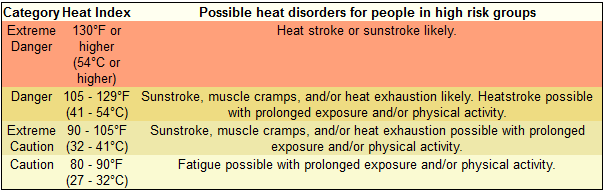

**Heat Index.** Temperature Heat Index (Indeks Kenyamanan) merupakan salah satu metode yang dapat digunakan untuk mengkaji tingkat kenyamanan di suatu daerah.
[Detik Health](https://health.detik.com/berita-detikhealth/d-6960103/suhu-dki-29-derajat-celcius-tapi-terasa-seperti-31-begini-mengartikan-heat-index)




***Heat Index itu menggabungkan suhu udara dengan tingkat kelembapan ( Humidity ) yang ada untuk menghasilkan suhu setara yang dirasakan***

#### Rata Rata Heat Index

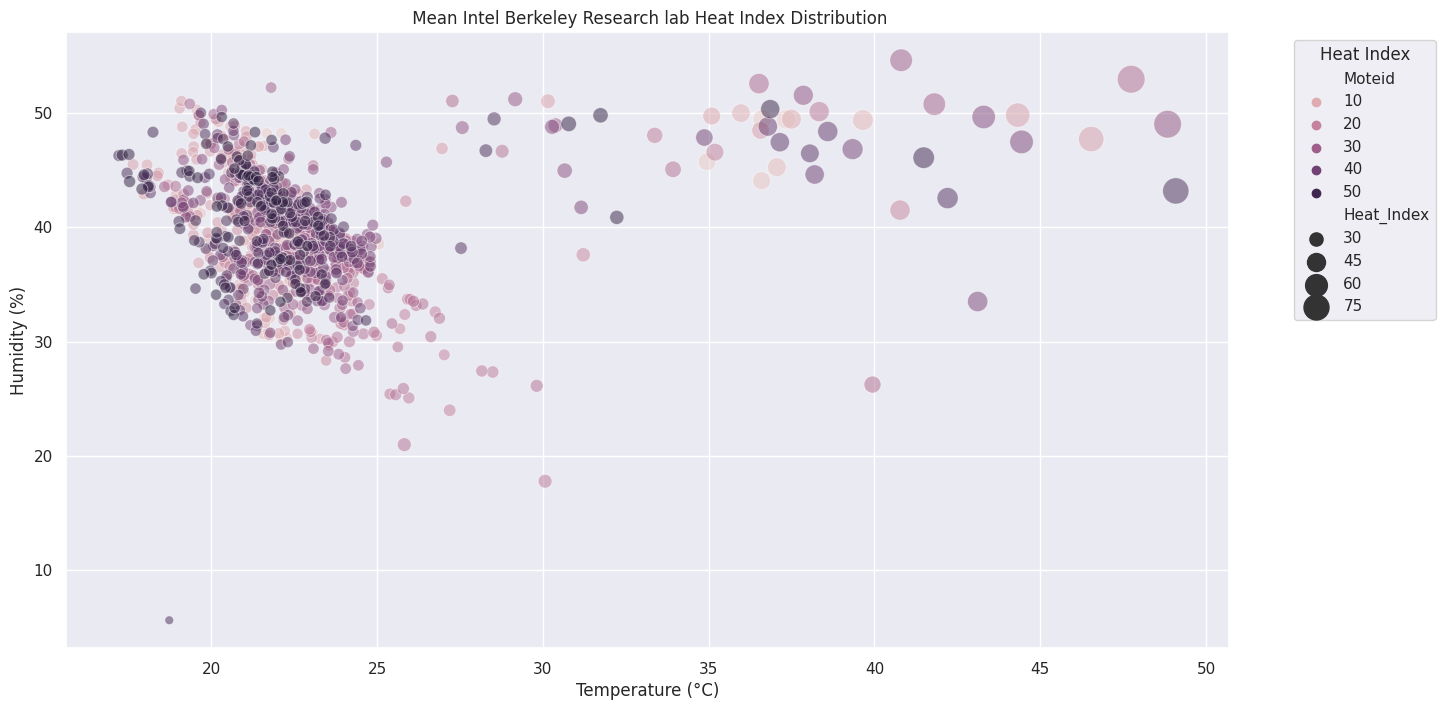

In [ ]:
plt.figure(figsize=(15, 8))
sns.set_theme(style="darkgrid")

sns.scatterplot(data=meanIntelwMoteDate,
                x='Temperature_(c)', y='Humidity_(%)',
                hue="Moteid" ,
                size="Heat_Index", sizes=(40,400), alpha=.5,
                s=100)


# Menambahkan label dan judul
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title(' Mean Intel Berkeley Research lab Heat Index Distribution')

plt.legend(title='Heat Index', bbox_to_anchor=(1.05, 1), loc='upper left')

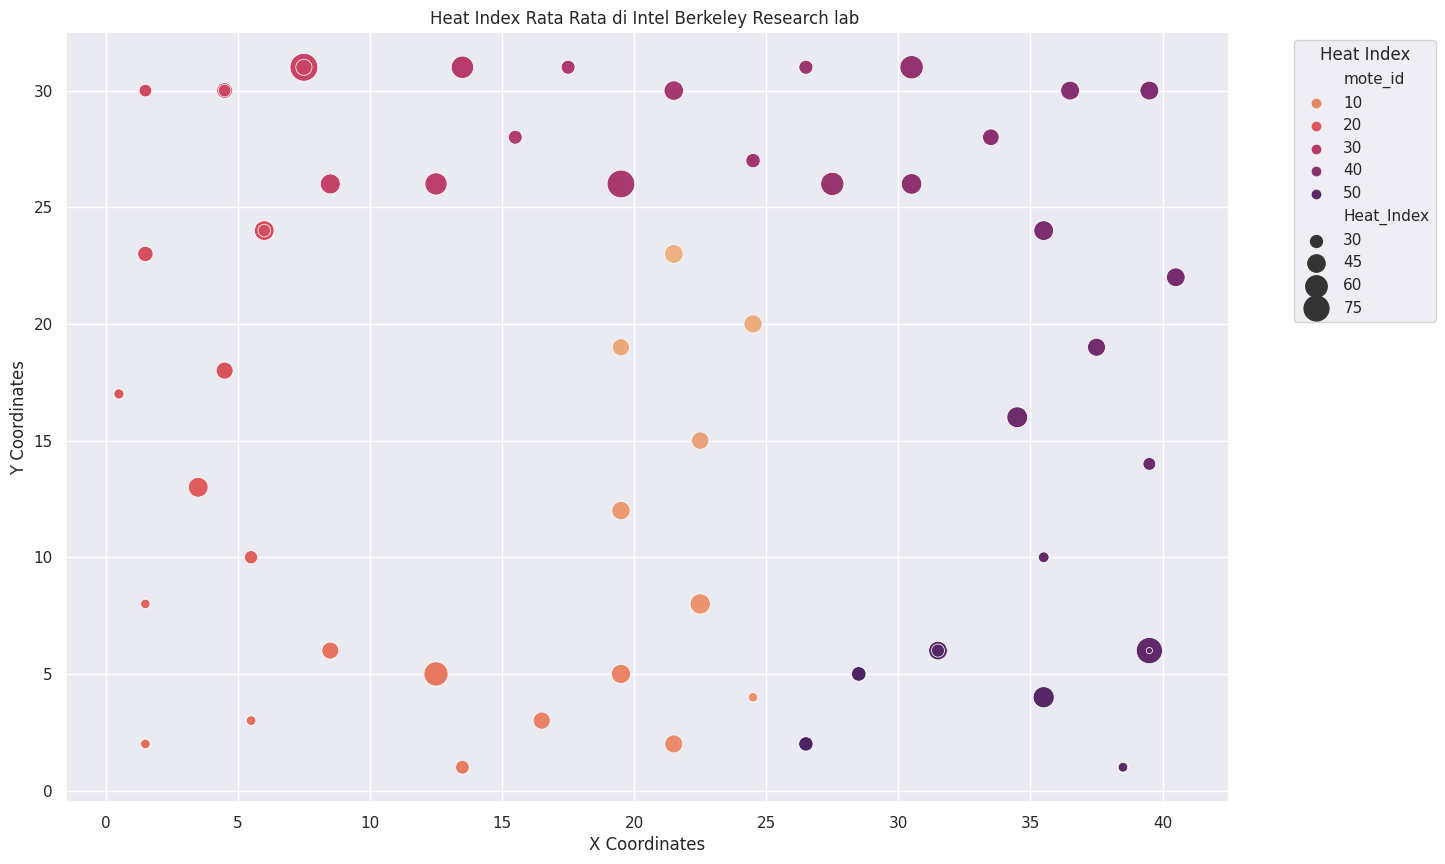

In [ ]:
plt.figure(figsize=(15, 10))
# sns.color_palette("flare", as_cmap=True)
# plt.scatter(moteLocs['x_cords'], moteLocs['y_cords'], c='blue', marker='o')
sns.scatterplot(data=meanIntelwMoteDate,
                x='x_cords', y='y_cords',
                hue="mote_id", size="Heat_Index" ,sizes=(20,400),
                palette="flare",legend="brief")
# Menambahkan label dan judul
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Heat Index Rata Rata di Intel Berkeley Research lab ')

plt.legend(title='Heat Index', bbox_to_anchor=(1.05, 1), loc='upper left')

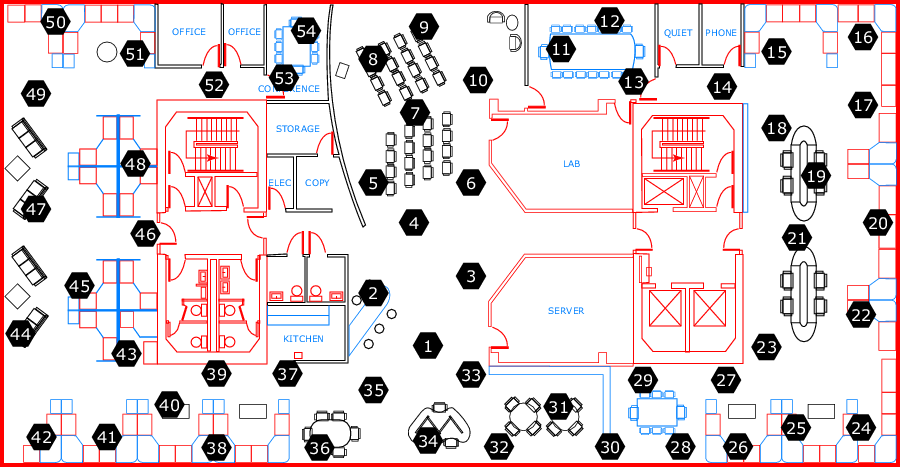

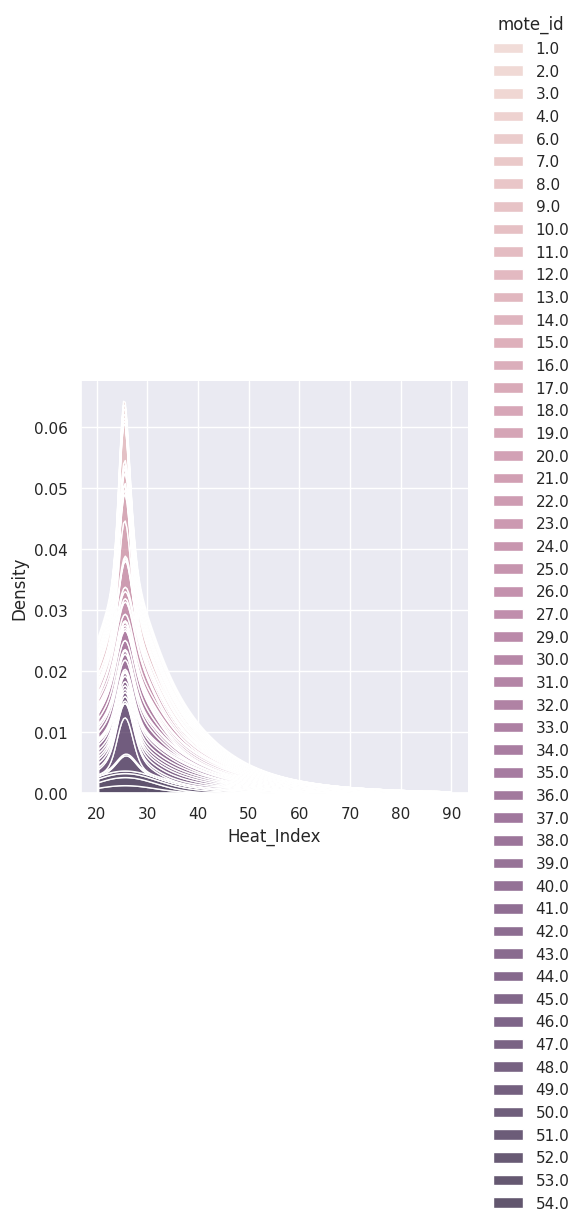

In [ ]:
sns.displot(meanIntelwMoteDate,
            x="Heat_Index", kind="kde",
            hue="mote_id", multiple="stack", cut=0, fill=True,bw_adjust=5
            )


#### Heatmap Rata Rata Heat Index di setiap Ruangan dengan tanggal

Text(483.55769230769283, 0.5, 'Mote Id')

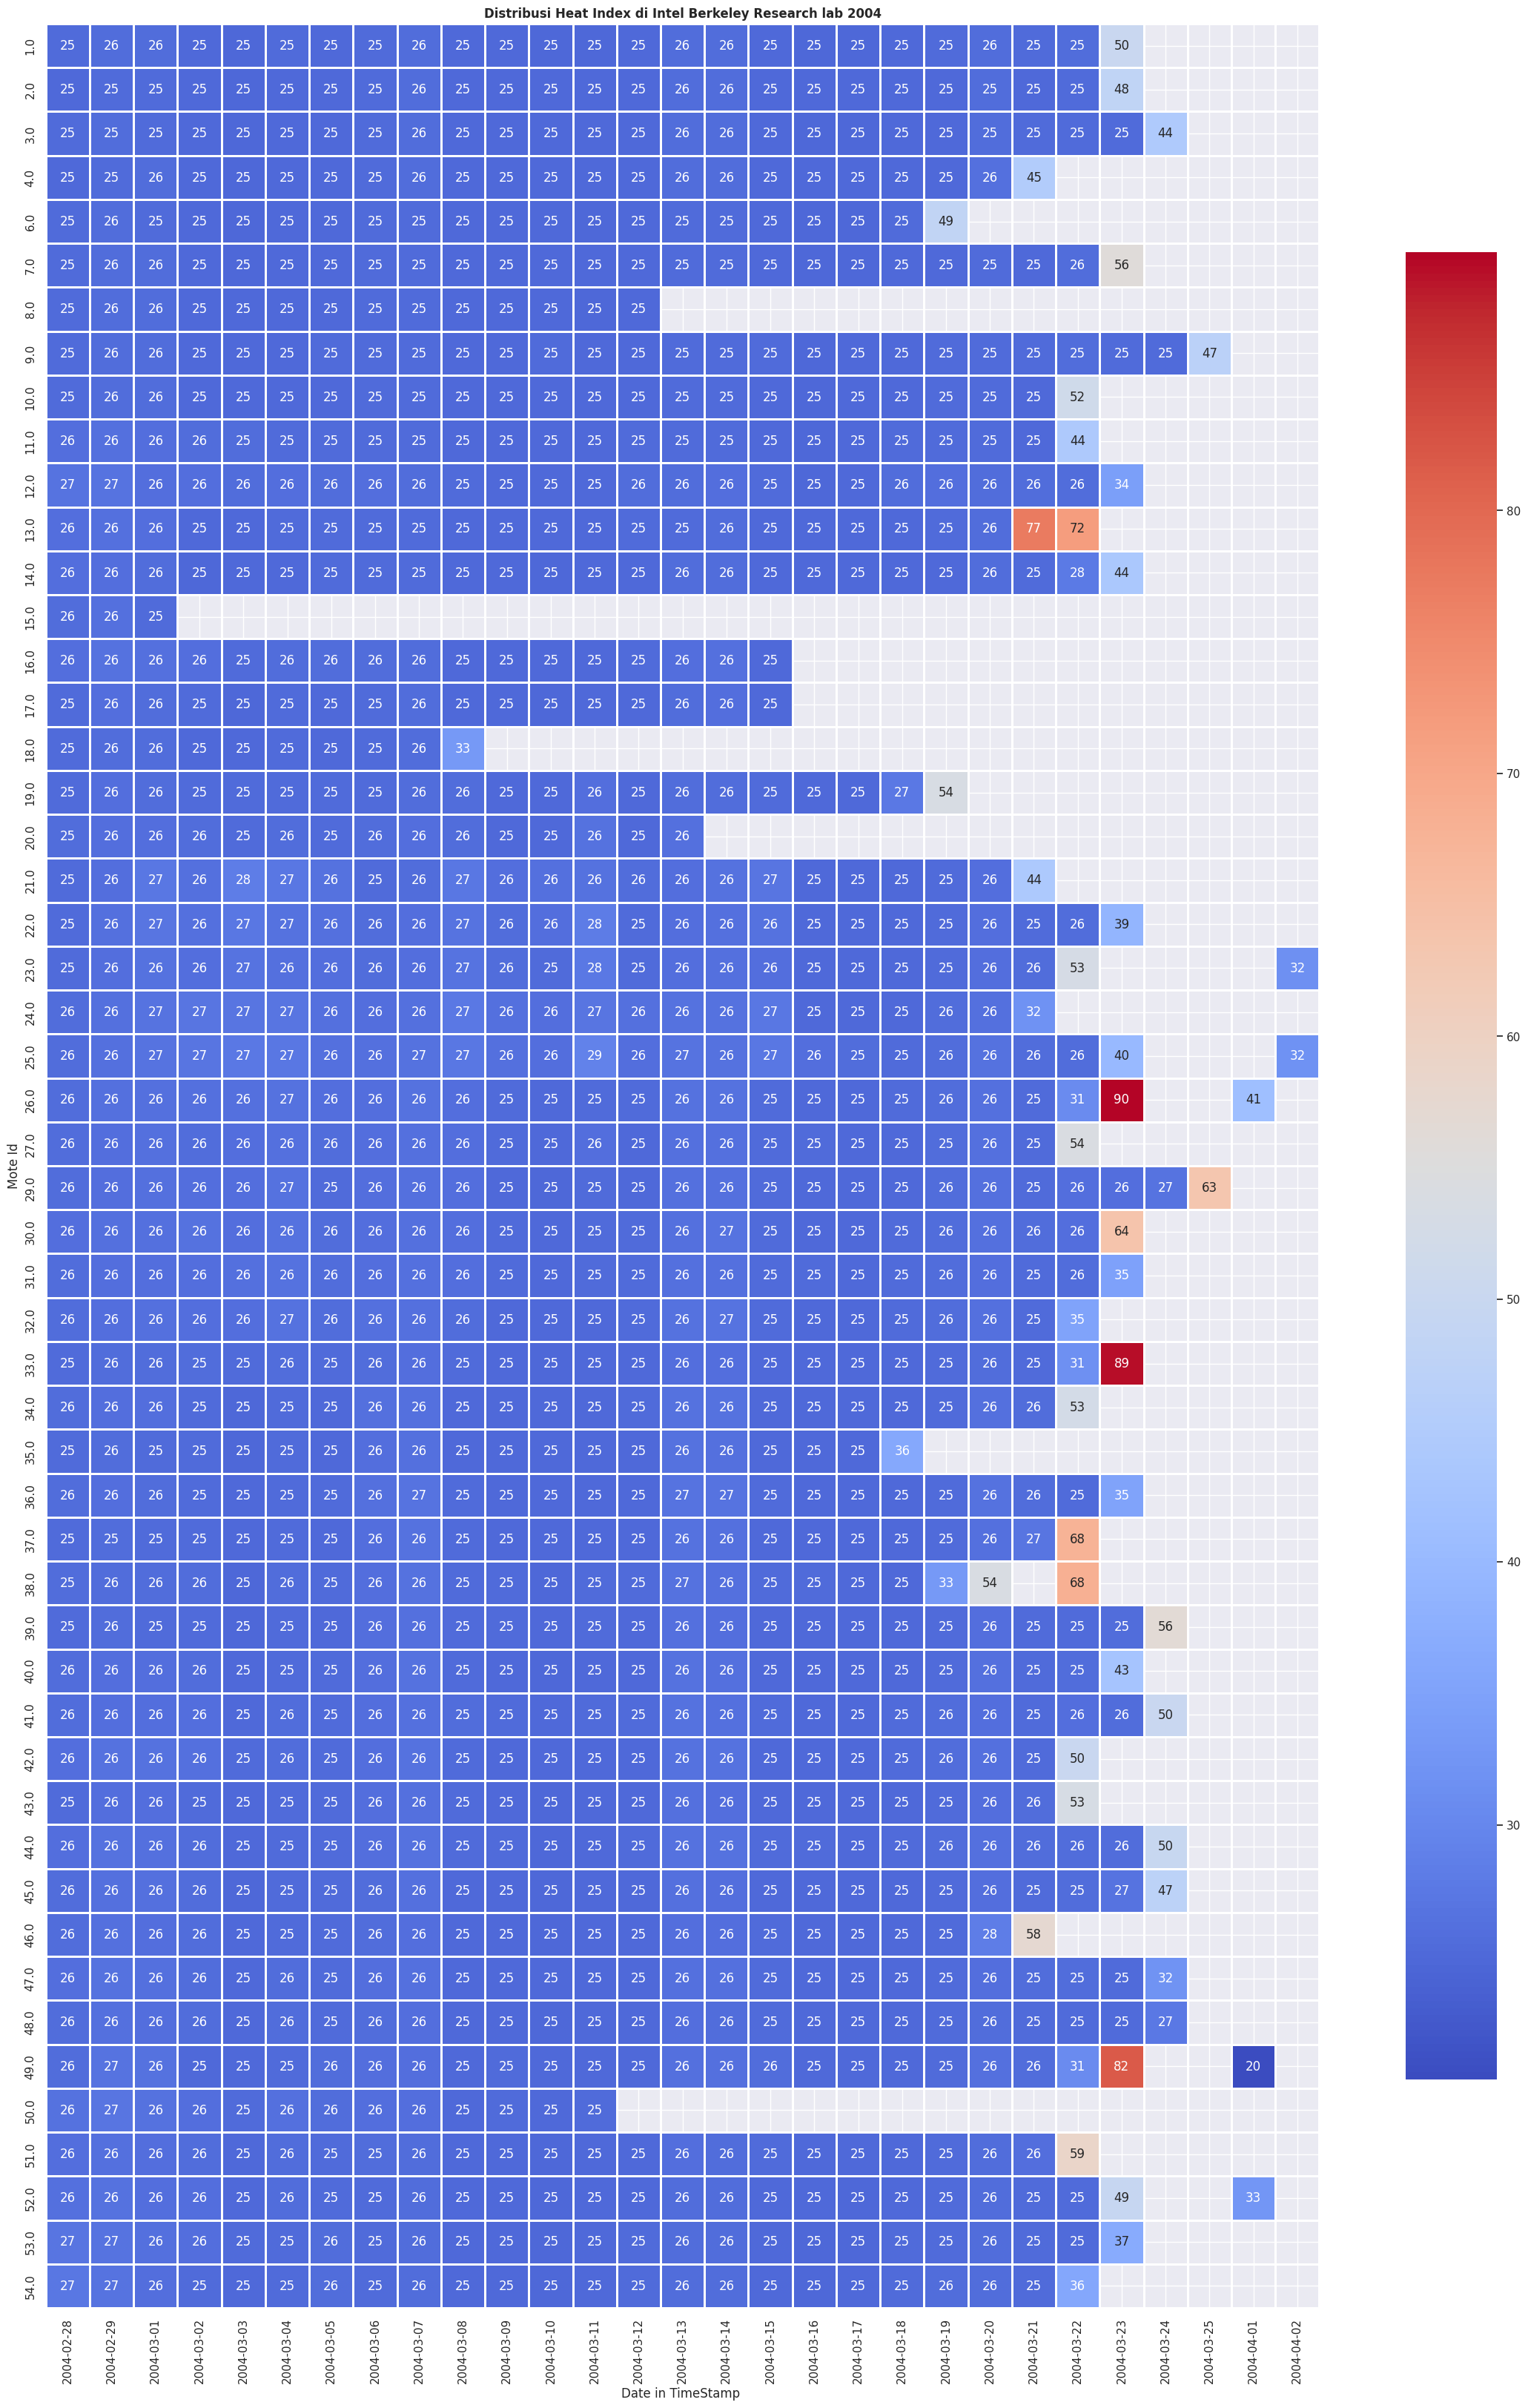

In [ ]:
fig, ax = plt.subplots(figsize=(30, 40))
# meanIntelwMoteDate.info()
intelHeatmap = (meanIntelwMoteDate.reset_index().pivot(index="Moteid", columns="Date", values="Heat_Index"))
intelHeatmap
sns.heatmap(intelHeatmap,
            cmap='coolwarm',
            square=True, linewidths=1,
            annot=True, fmt=".0f",cbar_kws={"shrink": 0.8}, ax=ax)


ax.set_title('Distribusi Heat Index di Intel Berkeley Research lab 2004', weight='bold')
ax.set_xlabel('Date in TimeStamp ')
ax.set_ylabel('Mote Id')

In [ ]:
maxIntelwMote = intelFinalwLoc.groupby(['Moteid']).max()
minIntelwMote = intelFinalwLoc.groupby(['Moteid']).min()
meanIntelwMote = intelFinalwLoc.groupby(['Moteid']).mean()

<ipython-input-79-2ad455a7bb89>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanIntelwMote = intelFinalwLoc.groupby(['Moteid']).mean()


In [ ]:
meanIntelwMoteDate

index  Epoch  Temperature_(c)  Humidity_(%)  \
Moteid Date                                                         
1      2004-02-28       659  1,551               21            36   
       2004-02-29     2,184  4,214               19            41   
       2004-03-01     4,014  7,155               21            40   
       2004-03-02     5,978  9,965               21            34   
       2004-03-03     7,916 12,807               22            30   
...                     ...    ...              ...           ...   
54     2004-03-18 2,301,085 56,408               20            46   
       2004-03-19 2,301,645 58,921               20            47   
       2004-03-20 2,302,330 61,859               21            43   
       2004-03-21 2,300,031 59,199               20            47   
       2004-03-22 2,284,520 31,227               32            50   

                   Tingkat Kecerahan_(Lux)  Voltage_(Volt)  mote_id  x_cords  \
Moteid Date                                                                    
1      2004-02-28                      176               3        1       22   
       2004-02-29                      126               3        1       22   
       2004-03-01                       81               3        1       22   
       2004-03-02                      133               3        1       22   
       2004-03-03                      112               3        1       22   
...                                    ...             ...      ...      ...   
54     2004-03-18                      332               2       54       26   
       2004-03-19                      527               2       54       26   
       2004-03-20                      767               2       54       26   
       2004-03-21                      731               2       54       26   
       2004-03-22                      869               2       54       26   

                   y_cords  Heat_Index  
Moteid Date                             
1      2004-02-28       23          25  
       2004-02-29       23          26  
       2004-03-01       23          26  
       2004-03-02       23          25  
       2004-03-03       23          25  
...                    ...         ...  
54     2004-03-18        2          25  
       2004-03-19        2          26  
       2004-03-20        2          26  
       2004-03-21        2          25  
       2004-03-22        2          36  

[1195 rows x 10 columns]

### Apakah Tingkat Kecerahan Dipengaruhi Oleh Suhu?

Dari sini saya menyimpulkan bahwa Tingkat kecerahan, menurun ketika suhu meningkat walaupun ada beberapa faktor lain seperti batasan hardware(lampu) atau rusak, akan tetapi listrik masih dialirkan walapun suhu meningkat

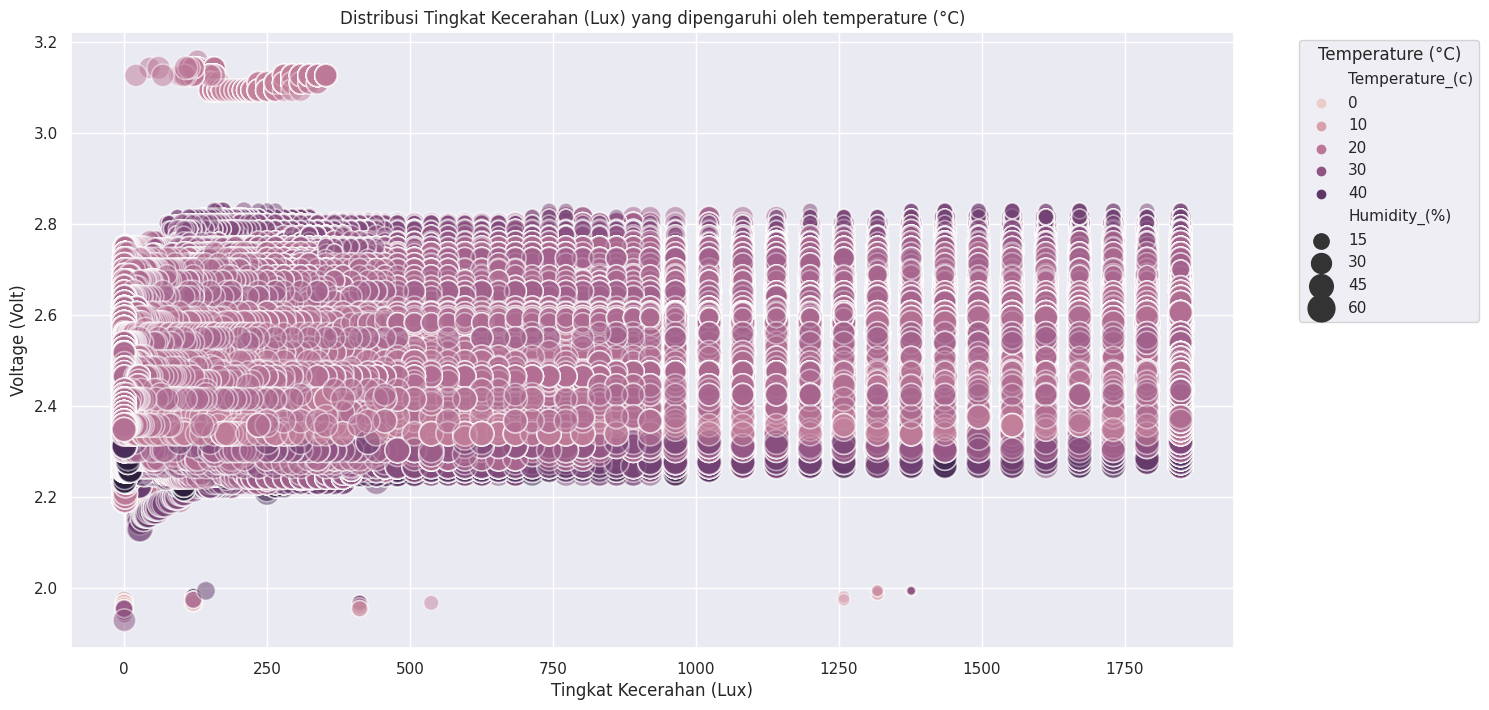

In [ ]:

plt.figure(figsize=(15, 8))
sns.set_theme(style="darkgrid")

sns.scatterplot(data=intelFinal,
                x='Tingkat Kecerahan_(Lux)', y='Voltage_(Volt)',
                hue="Temperature_(c)" , size="Humidity_(%)",
                sizes=(40,400), alpha=.5,
                s=100)


# Menambahkan label dan judul
plt.xlabel('Tingkat Kecerahan (Lux)')
plt.ylabel('Voltage (Volt)')
plt.title('Distribusi Tingkat Kecerahan (Lux) yang dipengaruhi oleh temperature (°C)')

plt.legend(title='Temperature (°C)', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
IntelwMote54_6 = intelFinalwLoc.query("Moteid >= 43 and Moteid <= 47 ")


Hal Ini diperjelas pengaruhnya pada sektor 43 sampai 47

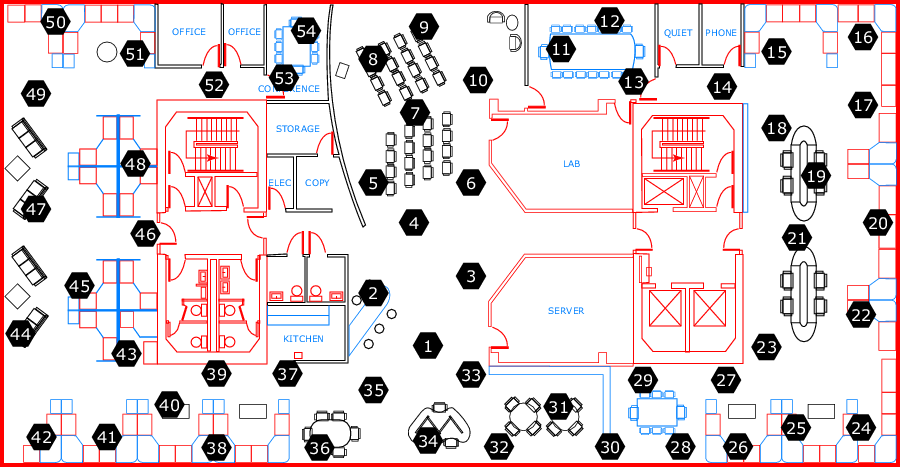

#### Analisa Tingkat Kecerahan pada sektor yang spesifik

* 0 - 200 lux: Cahaya yang minim, mirip dengan cahaya bulan atau penerangan buatan yang sangat rendah.
* 200 - 400 lux: Seperti suasana senja atau penerangan minimal di sekitar jalan.
* 400 - 600 lux: Sebanding dengan penerangan di lingkungan kantor yang terang atau saat matahari terbit/senja.
* 600 - 800 lux: Penerangan yang cukup untuk berbagai aktivitas di dalam ruangan, seperti membaca atau bekerja.
* 800 - 1000 lux: Kondisi penerangan yang terang, cocok untuk tugas-tugas yang membutuhkan tingkat visibilitas tinggi di dalam lab.


rata rata suhu meningkat, dan voltage menurun dan alhasil tingkat kecerahan menurun juga.

tetapi ada juga suhu rendah tetapi voltage turun dengan tingkat kecerahan cukup terang ( sektor 45 )

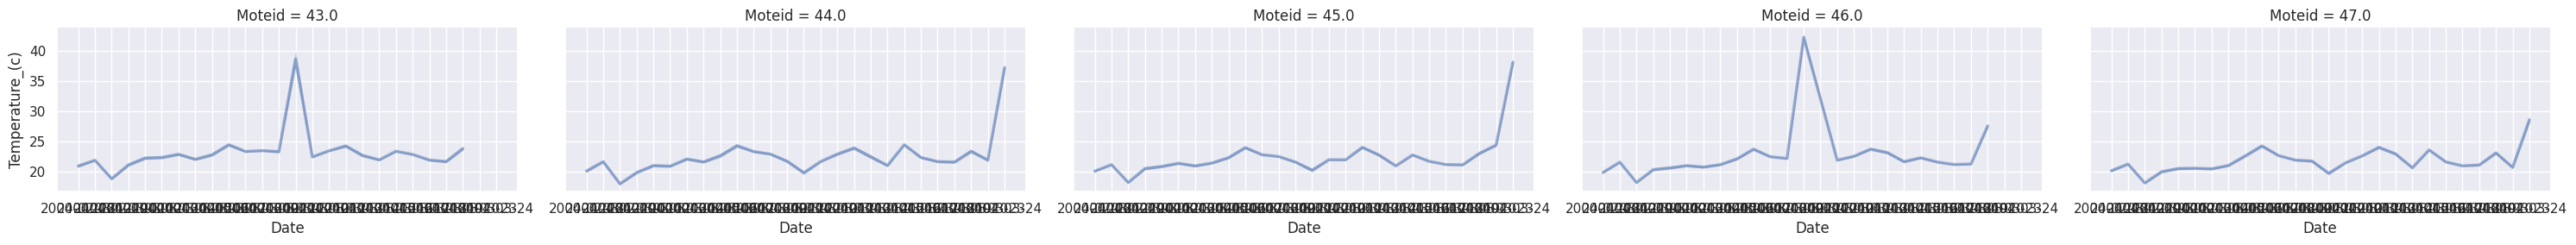

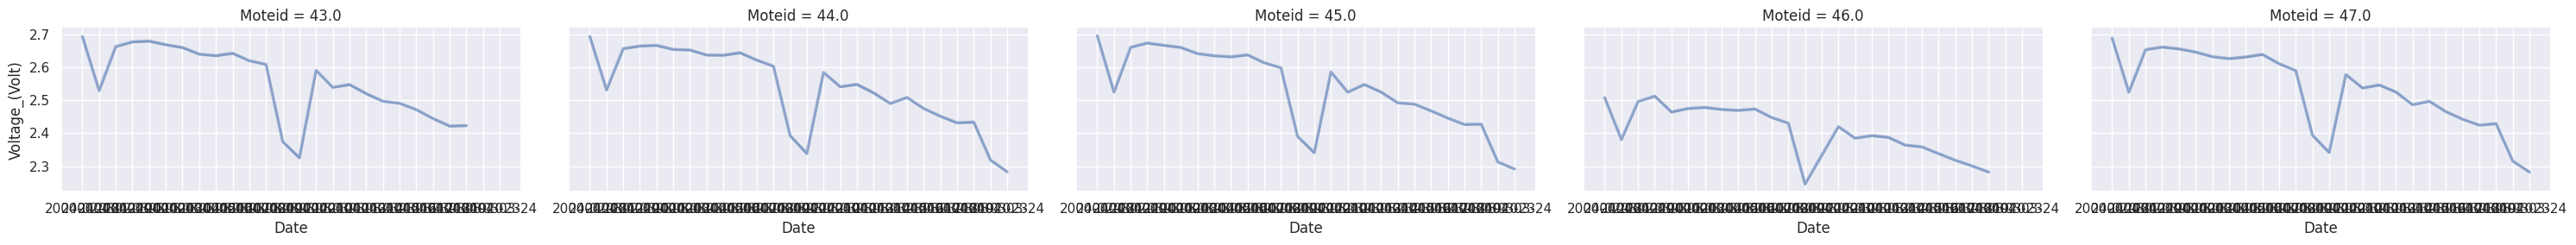

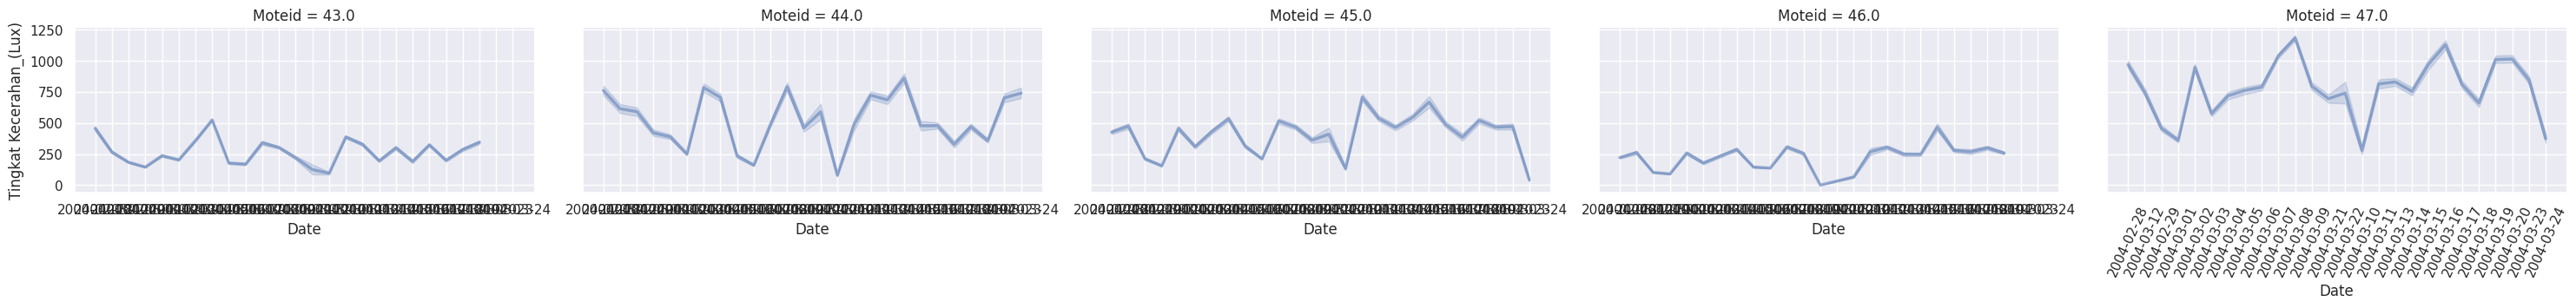

In [ ]:
sns.set_theme(style="darkgrid")

sns.relplot(data=IntelwMote54_6,
                x='Date', y='Temperature_(c)',
                col="Moteid", linewidth=2.5,
                kind="line", height=3, aspect=2, alpha=.5,
                )

sns.relplot(data=IntelwMote54_6,
                x='Date', y='Voltage_(Volt)',
                col="Moteid", linewidth=2.5,
                kind="line", height=3, aspect=2, alpha=.5,
                )

sns.relplot(data=IntelwMote54_6,
                x='Date', y='Tingkat Kecerahan_(Lux)',
                col="Moteid", linewidth=2.5,
                kind="line", height=3, aspect=2, alpha=.5,
                )
plt.xticks(rotation=65)


# Rata Rata
plt.show()

In [ ]:
meanIntelwMoteLux = intelFinalwLoc.groupby(['Moteid','Tingkat Kecerahan_(Lux)']).mean()

<ipython-input-69-feb728f4fb68>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanIntelwMoteLux = intelFinalwLoc.groupby(['Moteid','Tingkat Kecerahan_(Lux)']).mean()


Versi intensitasnya

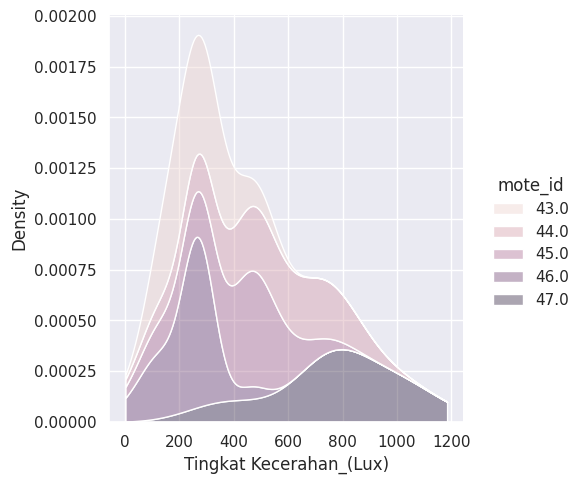

In [ ]:
sns.displot(meanIntelwMoteDate.query("Moteid >= 43 and Moteid <= 47 "),
            x="Tingkat Kecerahan_(Lux)", kind="kde",
            hue="mote_id", multiple="stack", cut=0, fill=True, alpha=.4
            )


In [ ]:
intelHeatmapLux = (meanIntelwMoteDate.pivot_table(index="Moteid",columns="Date", values="Tingkat Kecerahan_(Lux)" ))
intelHeatmapTemps = (meanIntelwMoteDate.pivot_table(index="Moteid",columns="Date", values="Temperature_(c)"))
intelHeatmapVoltage = (meanIntelwMoteDate.pivot_table(index="Moteid",columns="Date", values="Voltage_(Volt)" ))

#### Distribusi Heatmap

Text(341.25, 0.5, 'Mote Id')

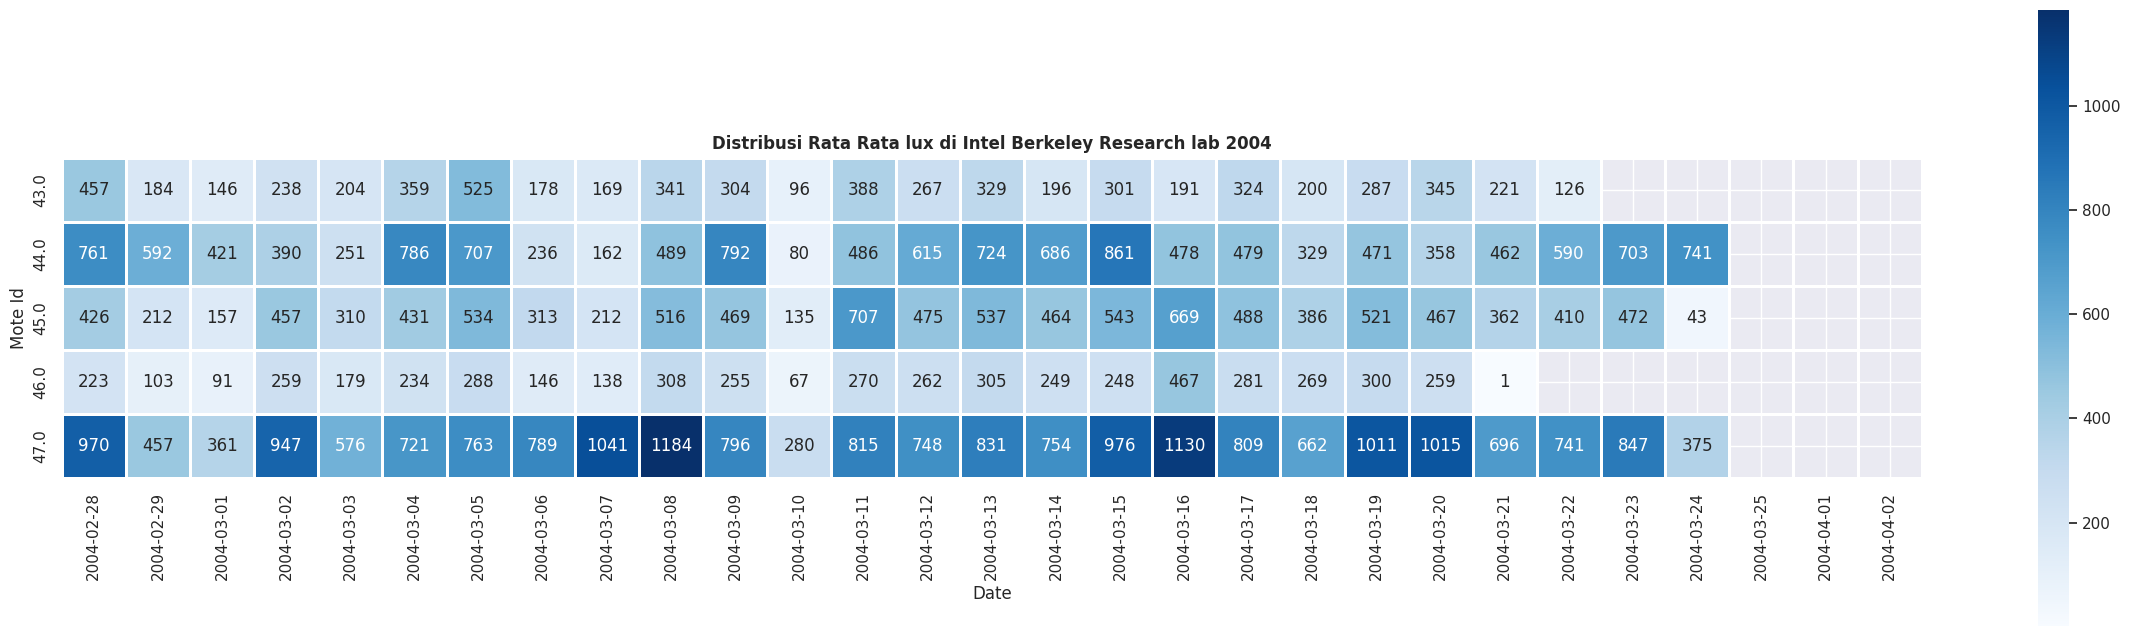

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
# meanIntelwMoteDate.info()

sns.heatmap(intelHeatmapLux.query("Moteid >= 43 and Moteid <= 47"),
            cmap='Blues',
            square=True, linewidths=1,
            annot=True, fmt=".0f",cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Distribusi Rata Rata lux di Intel Berkeley Research lab 2004', weight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Mote Id')

Text(341.25, 0.5, 'Mote Id')

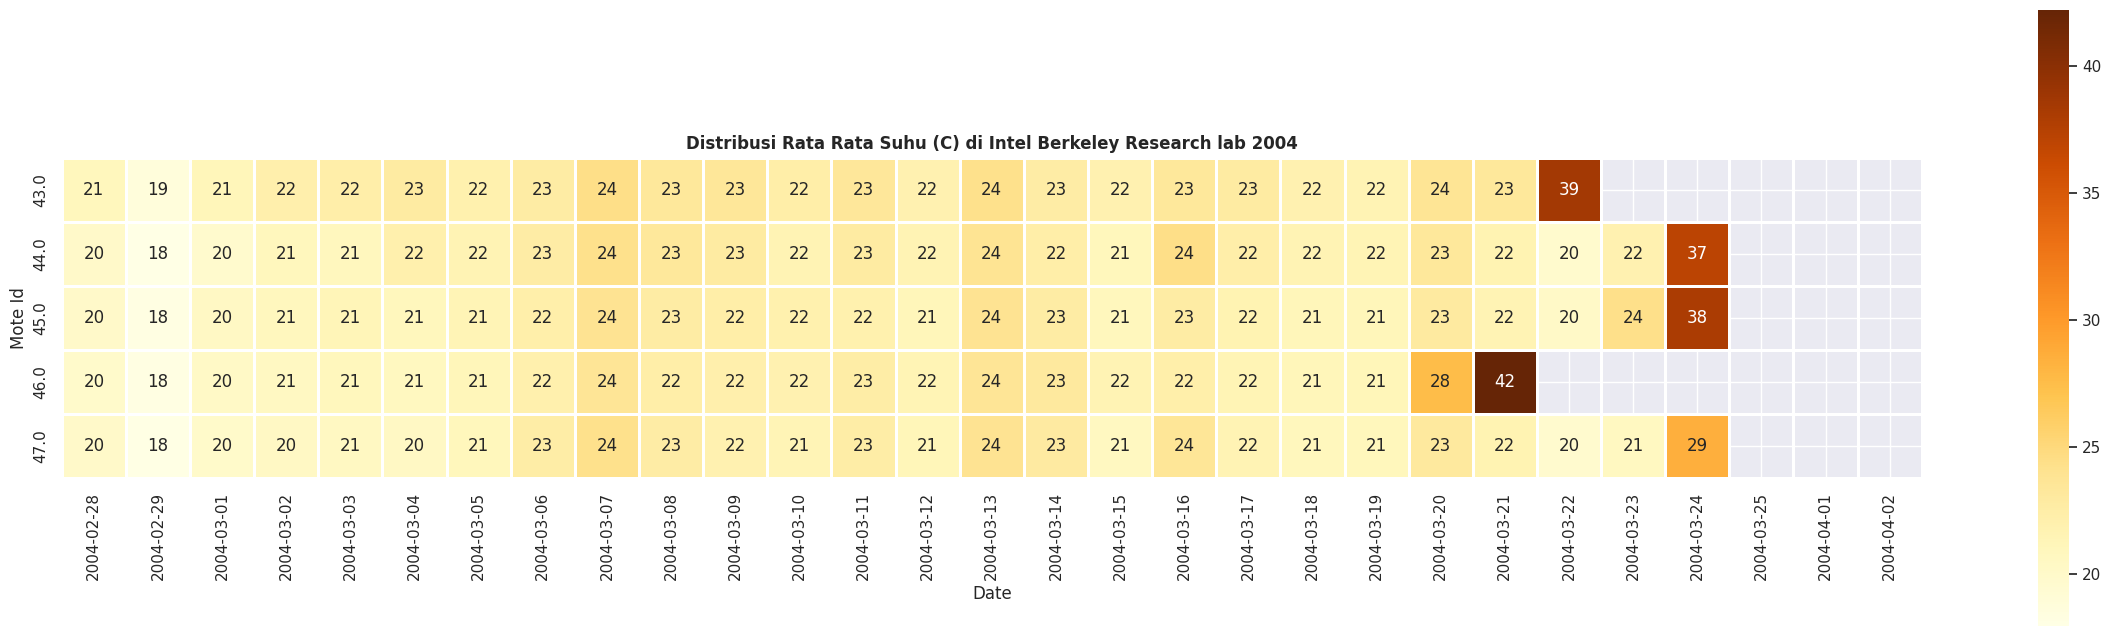

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
# meanIntelwMoteDate.info()

sns.heatmap(intelHeatmapTemps.query("Moteid >= 43 and Moteid <= 47"),
            cmap='YlOrBr',
            square=True, linewidths=1,
            annot=True, fmt=".0f",cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Distribusi Rata Rata Suhu (C) di Intel Berkeley Research lab 2004', weight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Mote Id')

Text(341.25, 0.5, 'Mote Id')

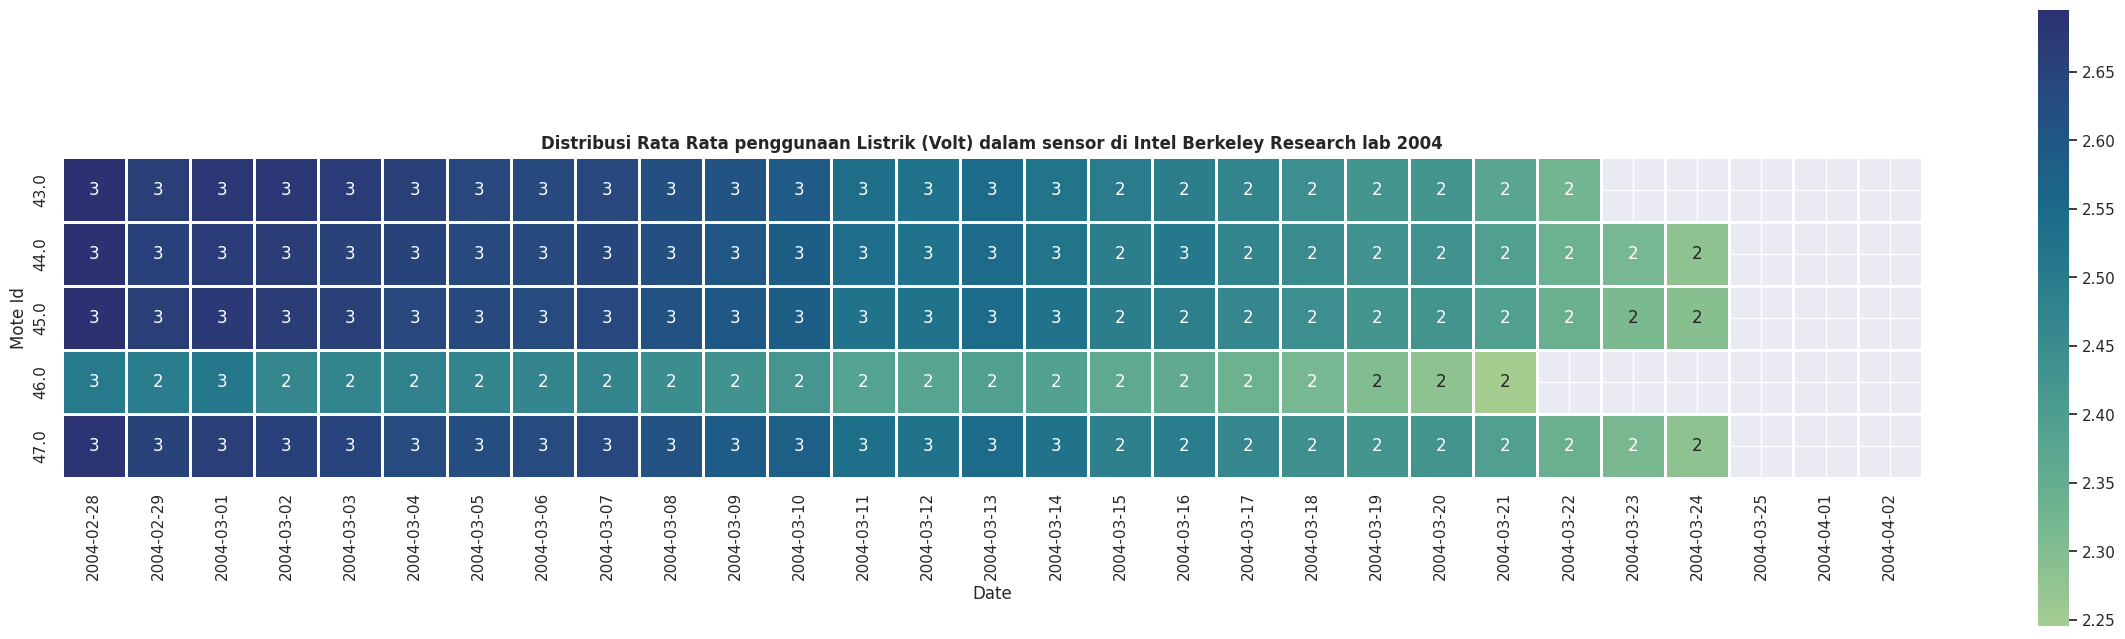

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
# meanIntelwMoteDate.info()

sns.heatmap(intelHeatmapVoltage.query("Moteid >= 43 and Moteid <= 47"),
            cmap='crest',
            square=True, linewidths=1,
            annot=True, fmt=".0f",cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Distribusi Rata Rata penggunaan Listrik (Volt) dalam sensor di Intel Berkeley Research lab 2004', weight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Mote Id')

In [ ]:
meanIntelwMote= intelFinalwLoc.groupby(["Moteid"]).mean()

<ipython-input-76-904fb9bb9efe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meanIntelwMote= intelFinalwLoc.groupby(["Moteid"]).mean()


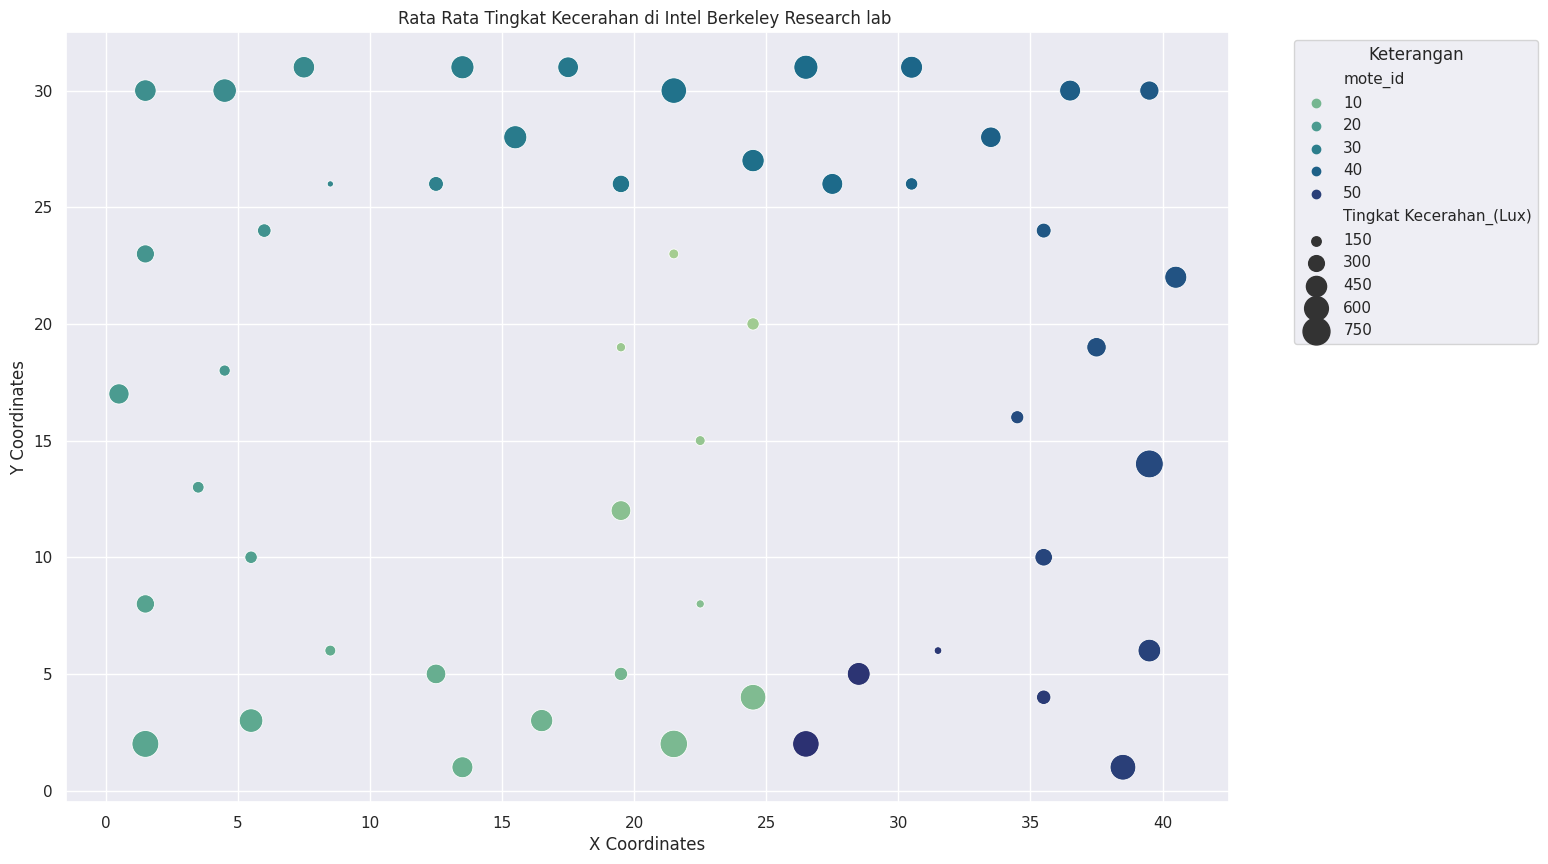

In [ ]:
plt.figure(figsize=(15, 10))
# sns.color_palette("flare", as_cmap=True)
# plt.scatter(moteLocs['x_cords'], moteLocs['y_cords'], c='blue', marker='o')
sns.scatterplot(data=meanIntelwMote,
                x='x_cords', y='y_cords',
                hue="mote_id", size="Tingkat Kecerahan_(Lux)" ,sizes=(20,400),
                palette="crest",legend="brief")
# Menambahkan label dan judul
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Rata Rata Tingkat Kecerahan di Intel Berkeley Research lab ')

plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')

*kesimpulan*

1. Suhu mempengaruhi tingkat kecerahan
2. banyak data yang belum di cleaning dari source
3. tingkat kenyamanan suhu disana lumayan standar dan nyaman menurut saya, kecuali anomali di akhir bulan ada beberapa yang aneh